# Section 1: Introduction:
In today's competitive business landscape, retaining customers is more crucial than ever. Companies often invest heavily in acquiring new customers, yet the cost of losing an existing customer can be even greater.

Understanding the factors that lead to customer churn—when a customer decides to stop using a service—is essential for creating effective retention strategies. Imagine having the power to predict which customers are at risk of leaving, enabling you to proactively address their needs and concerns before they decide to go.

<center><img src="https://www.cleartouch.in/wp-content/uploads/2022/11/Customer-Churn.png" width=500/></center>

By analyzing a comprehensive dataset that includes customer demographics, account details, and the services they've subscribed to, you can uncover the underlying reasons for churn. This knowledge allows businesses to tailor their retention programs, offering personalized solutions that enhance customer satisfaction and loyalty, ultimately driving long-term growth and profitability. Let's harness the power of data to not only understand why customers leave but to keep them engaged and committed to your brand.

# Section 2: Import the necessary Libraries

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Section 3: Loading the Data

Download the data [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

**Dataset Information:**

**Content:**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called `Churn`.
- ervices that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents.

In [154]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
# Loading the data
data = pd.read_csv("/content/drive/MyDrive/datasets/Customer_Churn.csv")

# Viewing the data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Observation:
- The column `customerID` might not be required to do the analysis.
So, let's drop this column.

In [156]:
# Remove the column - 'customerID'
data.drop(columns=['customerID'], inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [157]:
# Checking the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Observation:
- There are no null values in the dataset.

# Section 4: EDA
EDA is the process of analyzing and visualizing the dataset to uncover underlying patterns, trends, and relationships. It helps in understanding the data's structure and guiding the feature selection and modeling process.

## 4.1 Check the distribution of the target variable - `Churn`.


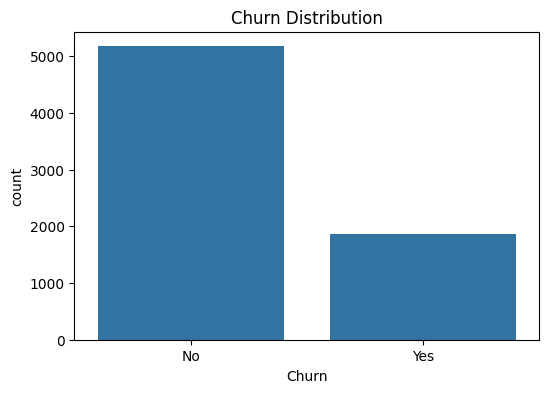

In [158]:
# Check the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()

### Interpretation:
- The dataset suffers from class imbalance.

## 4.2 Do an analysis of the churn rate wrt all the categorical variables

*Hint: Use normalized values to plot to avoid the class imbalance problem.*

In [159]:
# Analyze churn rate by categorical features
# Listing all the categorical columns
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

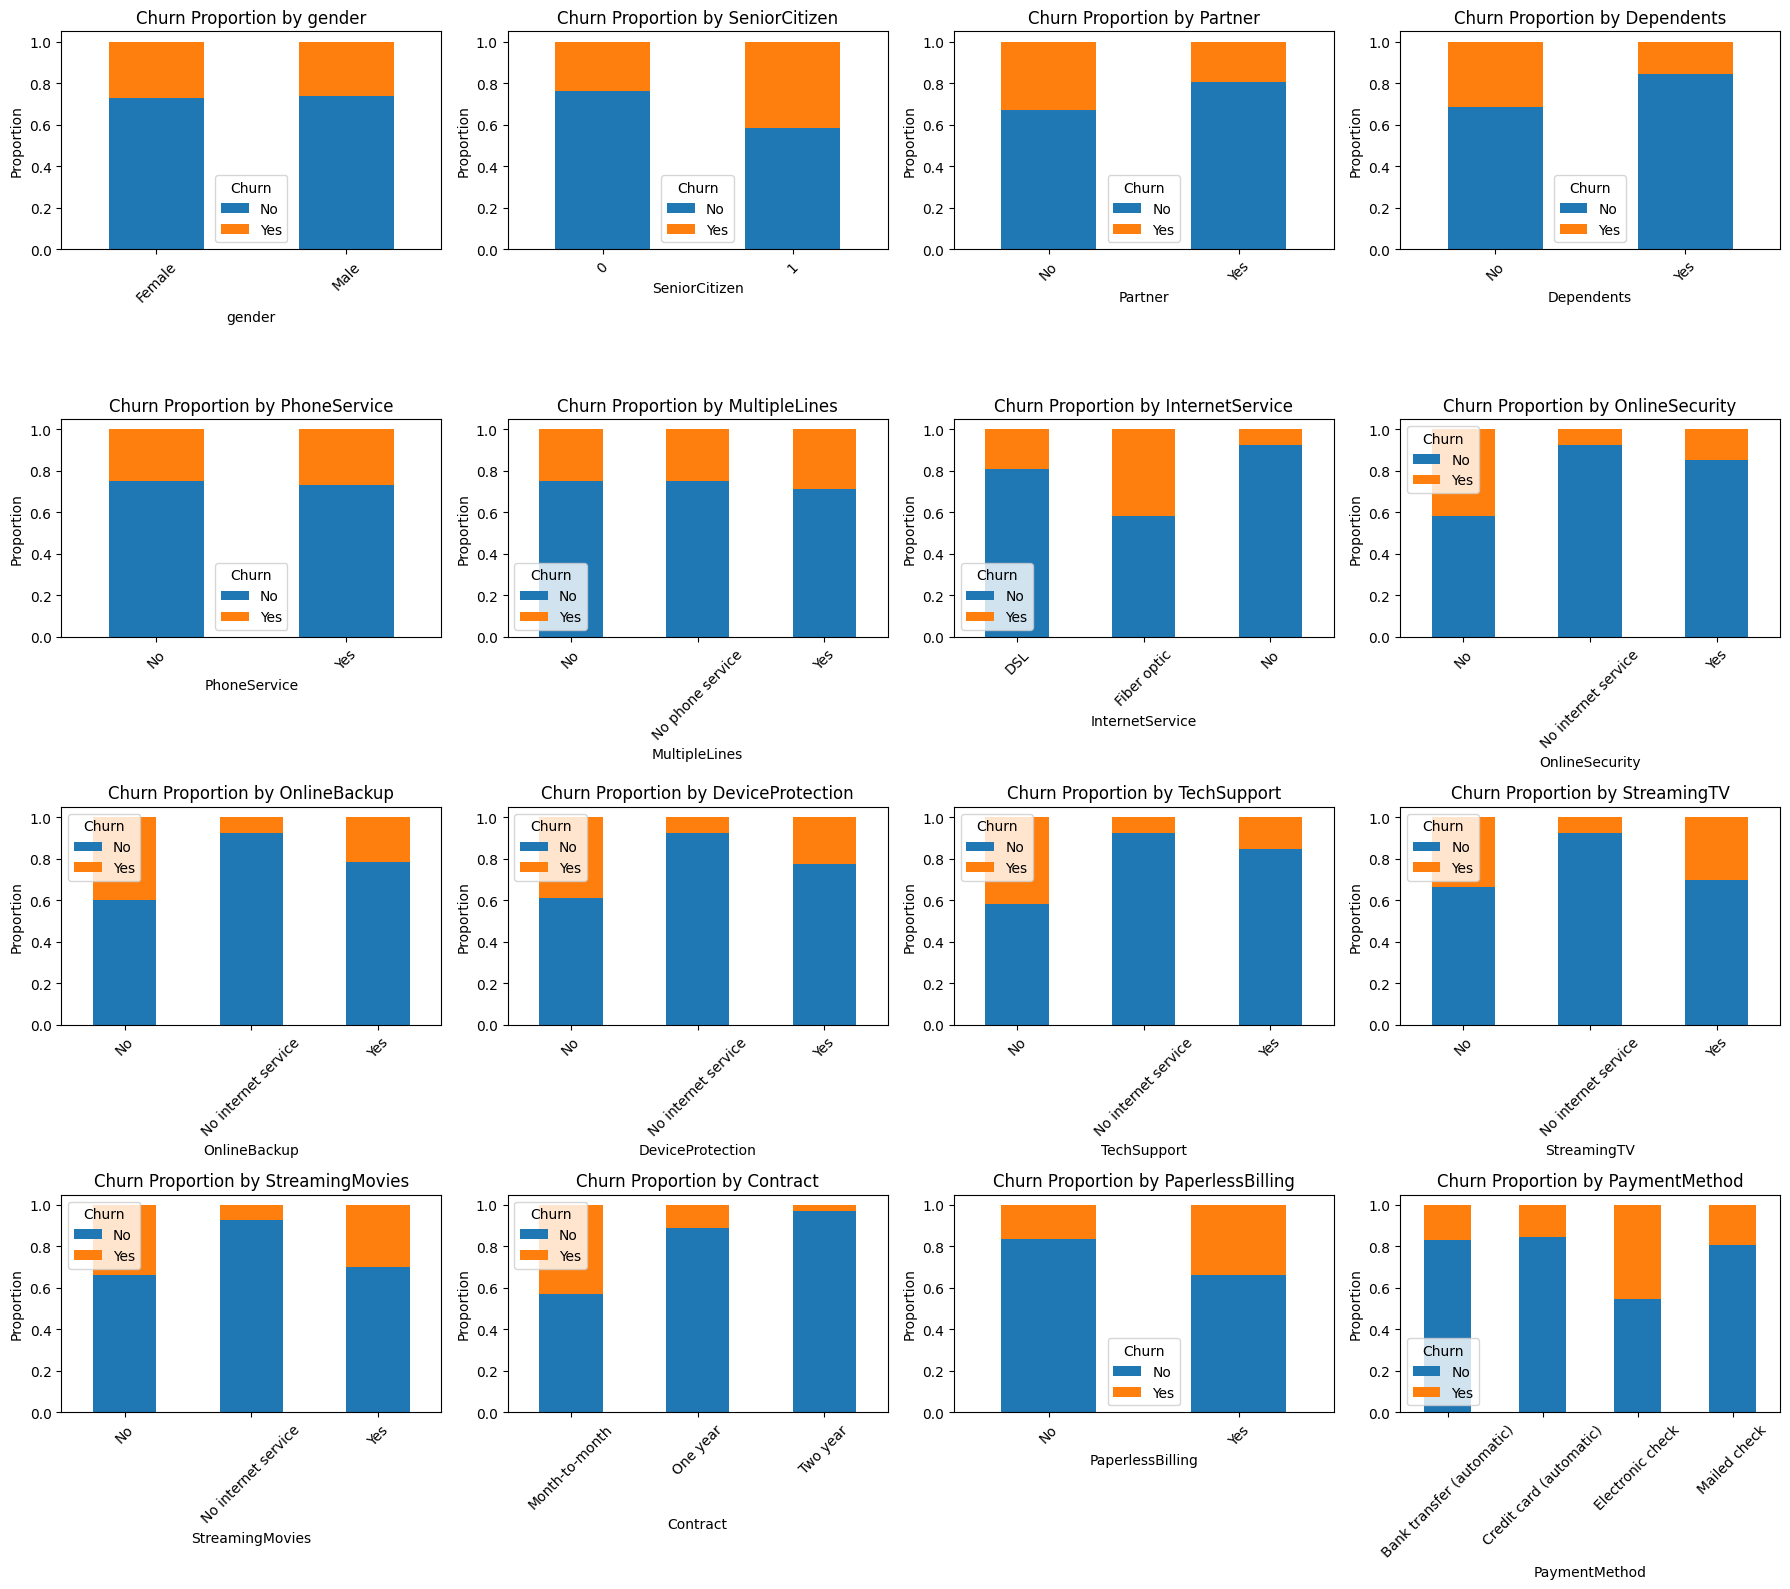

In [160]:
# Visualize the data
# Set up the subplot grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 16))
axes = axes.flatten()

# Plot each categorical feature in a subplot
for i, column in enumerate(categorical_columns):
    # Calculate normalized proportions because of class imbalance
    normalized_counts = (
        data.groupby(column)['Churn']
        .value_counts(normalize=True)
        .unstack()
    )

    # Plotting the normalized counts as bar plots
    normalized_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=axes[i])

    # Set title and labels
    axes[i].set_title(f"Churn Proportion by {column}")
    axes[i].set_ylabel('Proportion')
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()


### Interpretation:
- Month-to-month contracts have a significantly higher churn rate compared to one-year and two-year contracts.
- Fiber optic customers show a higher churn rate compared to DSL or those without internet service.
- Customers paying with electronic check tend to churn more compared to those using bank transfer or credit card.
- Customers who haven't subscribed to extra services like online security, tech support, or device protection are more likely to leave.
- Senior citizens seem to leave more often than non-senior customers.
- Customers using paperless billing are more likely to leave.

# Section 5: Feature Engineering

## 5.1 Convert `TotalCharges` column to numeric

In [161]:
# Converting TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## 5.2 Handle the categorical features by converting them to dummies

In [162]:
# One-hot encoding of the categorical features
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,No,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,Yes,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,No,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,Yes,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


## 5.3 Encode the `Churn` column
- `Yes` as 1
- `No` as 0

In [163]:
# Encode the 'Churn' column
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data['Churn'].head()

,Churn
0,0
1,0
2,1
3,0
4,1


## 5.4 Do a correlation analysis of the dataset

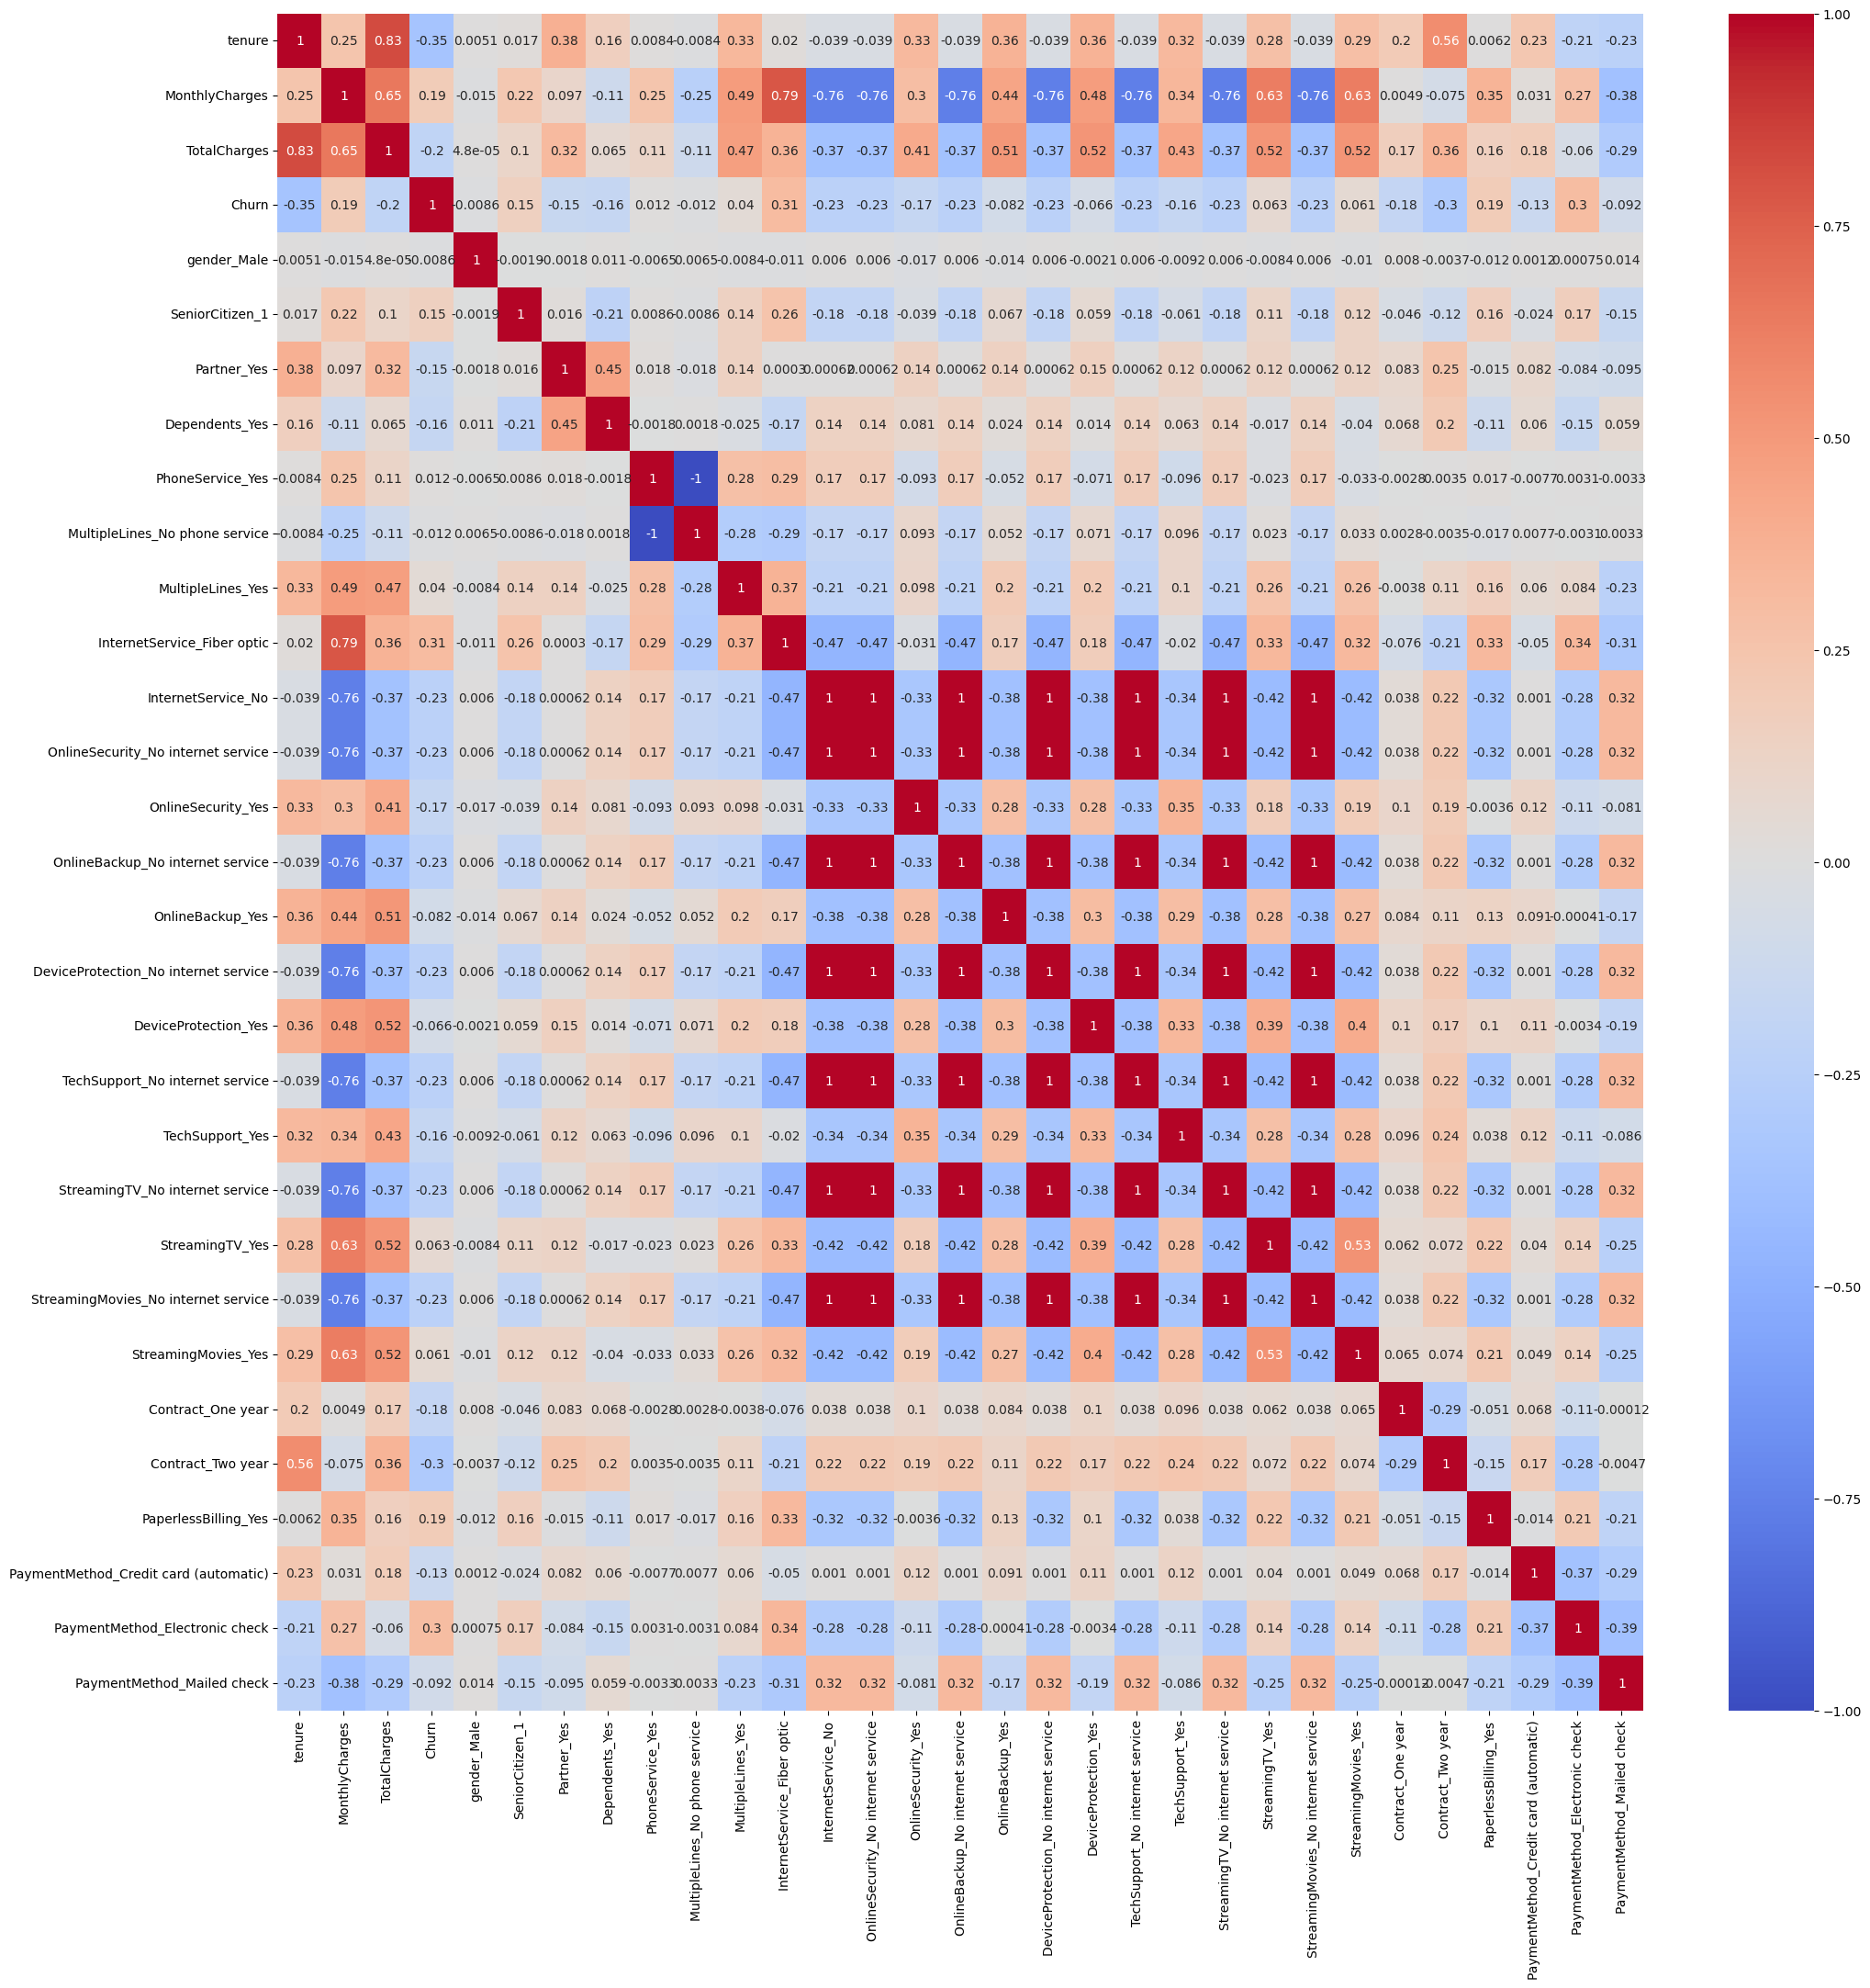

In [164]:
# Create a heatmap displying the correlation coefficients of the variables
corr = data.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Interpretation:
Here are the interpretation pointers for the correlation matrix displayed:

1. **Churn Correlation**:
   - The `Churn` variable has a moderate positive correlation with variables like `MonthlyCharges` and `InternetService_Fiber optic`.
   - There is a negative correlation between `Churn` and variables like `tenure`, `Contract_Two year`, `TechSupport_Yes`, `OnlineSecurity_Yes`, and `InternetService_No`.

2. **MonthlyCharges and TotalCharges**:
   - `MonthlyCharges` is highly correlated with `TotalCharges`, indicating that higher monthly charges generally lead to higher total charges.

3. **Service Features**:
   - Features like `OnlineSecurity_No internet service`, `TechSupport_No internet service`, and other service-related features are highly correlated with each other, especially those under the same category (e.g., internet services).

4. **Tenure and Contract**:
   - `Tenure` has a strong positive correlation with `Contract_Two year` and a moderate positive correlation with `Contract_One year`, suggesting that customers with longer tenures are more likely to be on longer contracts.
   - Conversely, `tenure` is negatively correlated with `Churn`, indicating that customers who stay longer are less likely to churn.

5. **Contract Types**:
   - The `Contract_Two year` variable shows a strong negative correlation with `Churn`, while `Contract_Month-to-month` has a positive correlation with `Churn`, implying that customers with longer contracts are less likely to churn compared to those on a month-to-month contract.

6. **Gender and Senior Citizen**:
   - `Gender` and `SeniorCitizen` variables show very low correlations with `Churn`, suggesting they do not significantly impact whether a customer churns.

7. **Multiple Lines and Phone Service**:
   - The correlation between `MultipleLines_No phone service` and `PhoneService` is very high, as expected, since not having phone service directly implies not having multiple lines.

These observations suggest that certain features like contract type, tenure, and specific services (e.g., tech support, online security) are more strongly associated with customer churn.

## 5.5 Check for null values & handle them

In [165]:
# Checking the null values
data.isna().sum()

,0
tenure,0
MonthlyCharges,0
TotalCharges,11
Churn,0
gender_Male,0
SeniorCitizen_1,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_No phone service,0


### Observation:
- There are null values in the `TotalCharges` column.

In [166]:
# Imputing with the mean
# Calculating the mean of the data
total_charges_mean = np.mean(data['TotalCharges'])
# Impute the mean
data['TotalCharges'].fillna(total_charges_mean, inplace=True)

# Check the data
data.isna().sum()

,0
tenure,0
MonthlyCharges,0
TotalCharges,0
Churn,0
gender_Male,0
SeniorCitizen_1,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_No phone service,0


# Section 6: Model Building

## 6.1 Split the data into train and test

In [167]:
# Importing the required module
from sklearn.model_selection import train_test_split

# Define a function to split the data
def split_data(df: pd.DataFrame, target: str, test_size: float):
    # Create 'X'
    X = df.drop([target], axis=1)
    # Create 'y'
    y = df[target]
    # Split into train & test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    return X_train, X_test, y_train, y_test

In [168]:
# Call the function to split the data
X_train, X_test, y_train, y_test = split_data(data, 'Churn', 0.2)

In [169]:
# Check the data
X_train[:5]

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3738,35,49.20,1701.65,True,False,False,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False
3151,15,75.10,1151.55,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4860,13,40.55,590.35,True,False,True,True,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3867,26,73.50,1905.70,False,False,True,False,True,False,False,...,False,True,False,True,False,True,True,True,False,False
3810,1,44.55,44.55,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False


## 6.2 Scale the data

In [170]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 6.3 Build the Logistic Regression Model & check the metrics

In [171]:
# Building the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred[:5]

array([0, 1, 0, 0, 0])

In [172]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



### Interpretation:
- The model has a good overall accuracy but the precision  and recallindicate that while the model correctly identifies a reasonable number of positive cases, it still misses some, and also makes some false positive errors. The F1-score  suggests a balance between precision and recall, but there's room for improvement in either or both metrics to better capture true positives and reduce false positives.

## 6.4 Build a KNN model & Check the metrics

In [173]:
# Initialize the KNN model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluation of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1035
           1       0.53      0.50      0.51       374

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.75      0.75      1409



### Interpretation;
- The model performs well in identifying non-churn cases (Class 0) with high precision and a decent F1-score. However, it struggles with accurately predicting churn (Class 1), as indicated by the lower precision and F1-score, which suggests room for improvement in handling positive cases.

## 6.5 Handle the class imbalance  & check the metrics

In [174]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Initialize the Logistic Regression model
logistic_model = LogisticRegression(class_weight='balanced', random_state=42)

# Fit the model on the smoted data
logistic_model.fit(X_train_smote, y_train_smote)

# Predict on the testing set
y_pred = logistic_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [175]:
# Initialize the KNN model
knn = KNeighborsClassifier()

# Fit the model on smoted data
knn.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluation of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1035
           1       0.44      0.69      0.54       374

    accuracy                           0.69      1409
   macro avg       0.65      0.69      0.65      1409
weighted avg       0.75      0.69      0.71      1409



### Interpretation:
- After applying SMOTE, the recall for the minority class (1) improved significantly , indicating that the models are now better at identifying the positive class. However, this came at the cost of precision and overall accuracy, which decreased slightly, reflecting a trade-off between detecting more positives and increasing false positives.